In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
#used to remove extra space, underscore form the column name 
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [7]:
#  Clean whitespace and lowercase
df['classification'] = df['classification'].astype(str).str.strip().str.lower()

In [8]:
print("Unique values before filtering:\n", df['classification'].unique())
print("Counts of each:\n", df['classification'].value_counts(dropna=False))


Unique values before filtering:
 ['ckd' 'notckd']
Counts of each:
 classification
ckd       250
notckd    150
Name: count, dtype: int64


In [9]:
#Remove rows where 'classification' is missing or unknown
df = df[df['classification'].isin(['ckd', 'notckd'])]

#Encode target (ckd=1, notckd=0)
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [10]:
df.shape

(400, 26)

In [11]:
# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
        df[col] = le.fit_transform(df[col])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [12]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,2,1,1,...,32,72,34,2,5,2,1,1,1,1
1,1,7.0,50.0,1.020,4.0,0.0,0,2,1,1,...,26,56,49,1,4,2,1,1,1,1
2,2,62.0,80.0,1.010,2.0,3.0,2,2,1,1,...,19,70,49,1,5,2,2,1,2,1
3,3,48.0,70.0,1.005,4.0,0.0,2,1,2,1,...,20,62,19,2,4,2,2,2,2,1
4,4,51.0,80.0,1.010,2.0,0.0,2,2,1,1,...,23,68,27,1,4,2,1,1,1,1


In [13]:
print("Duplicate rows removed:", df.duplicated().sum())


Duplicate rows removed: 0


In [14]:
df.shape

(400, 26)

In [15]:
##Split into feature and target 
X = df.drop(['classification','id'], axis=1)
Y = df['classification']

In [16]:
print("📊 Class distribution:\n", Y.value_counts(normalize=True))

📊 Class distribution:
 classification
1    0.625
0    0.375
Name: proportion, dtype: float64


In [17]:
value_caount = df['classification'].value_counts()
value_caount

classification
1    250
0    150
Name: count, dtype: int64

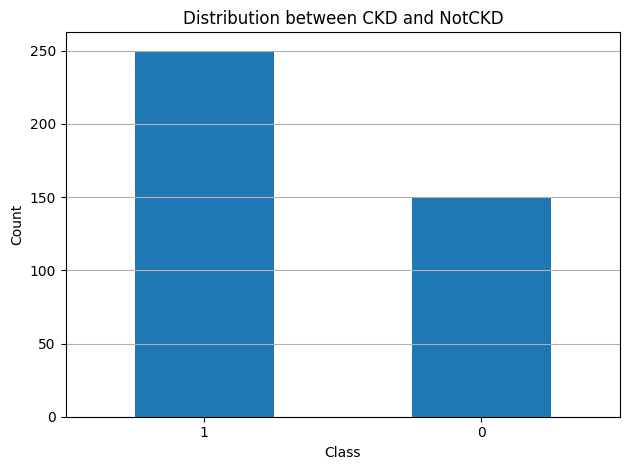

In [18]:
plt.plot(figsize=(2,2))
value_caount.plot(kind='bar')
plt.title("Distribution between CKD and NotCKD")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [19]:
# initialization RandomForestClassifier for best feature selectionin from dataset 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
rf.fit(X,Y)

RandomForestClassifier(random_state=42)

In [21]:
#top 5 best feature select by RandomForestClassifier
impotant_feature = pd.Series(rf.feature_importances_, index=X.columns)
top_5_feature = impotant_feature.sort_values(ascending = False).head(5).index.tolist()

In [22]:
impotant_feature.sort_values(ascending = False).head(5)

sg      0.178990
hemo    0.164472
sc      0.134909
al      0.104018
pcv     0.071281
dtype: float64

sg (Specific Gravity) --> Indicates urine concentration; low values often signal impaired kidney function.

hemo (Hemoglobin) -->  Reflects oxygen-carrying capacity of blood; lower levels are common in CKD patients due to anemia.

sc (Serum Creatinine) --> Measures kidney filtration efficiency; elevated levels typically indicate reduced kidney function.

al (Albumin) --> Presence of albumin in urine suggests kidney damage and protein leakage.

pcv (Packed Cell Volume) -->  Indicates red blood cell proportion; lower values may occur in CKD due to reduced erythropoietin production.

In [23]:
print(top_5_feature)

['sg', 'hemo', 'sc', 'al', 'pcv']


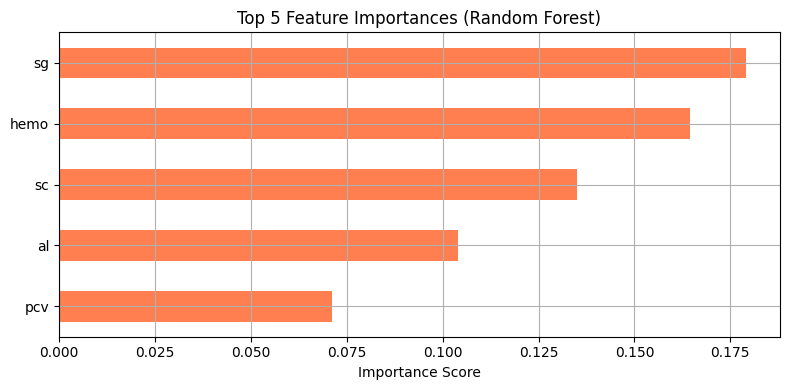

In [24]:
impotant_feature[top_5_feature].sort_values().plot(kind='barh', figsize=(8, 4), color='coral')
plt.title("Top 5 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:

new_X = X[top_5_feature]

In [26]:
# #make the new csv file of new seleced feature using randomForestClassifier
# pd.concat([new_X, Y], axis =1).to_csv("Top_5_features_with_label.csv", index=False)

In [27]:
new_X

,sg,hemo,sc,al,pcv
0,1.020,15.4,1.2,1.0,32
1,1.020,11.3,0.8,4.0,26
2,1.010,9.6,1.8,2.0,19
3,1.005,11.2,3.8,4.0,20
4,1.010,11.6,1.4,2.0,23
...,...,...,...,...,...
395,1.020,15.7,0.5,0.0,35
396,1.025,16.5,1.2,0.0,42
397,1.020,15.8,0.6,0.0,37
398,1.025,14.2,1.0,0.0,39


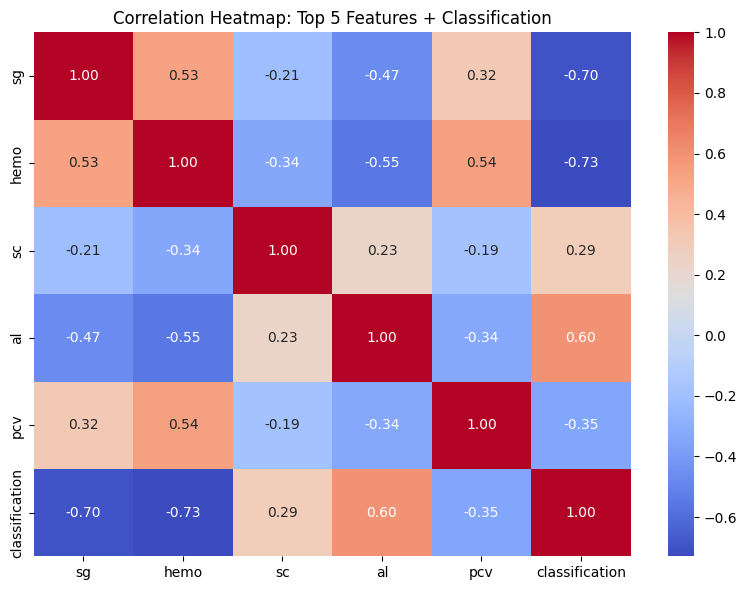

In [28]:
# Combine top 5 features with the target
selected_df = pd.concat([new_X, Y], axis=1)

# Correlation heatmap for selected features
plt.figure(figsize=(8, 6))
sns.heatmap(selected_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap: Top 5 Features + Classification")
plt.tight_layout()
plt.show()


In [29]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(new_X, Y, test_size=0.3, stratify=Y, random_state=42)


In [30]:
# Model training
final_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=4, 
    min_samples_leaf=2, 
    random_state=42,
    max_features='sqrt',
    class_weight='balanced',
)


In [31]:
final_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

#### Training datseet accuracy

In [32]:
training_pred = final_model.predict(x_train)

In [33]:
training_accuracy = accuracy_score(y_train, training_pred)

In [34]:
training_accuracy

0.9928571428571429

In [35]:
# Evaluate testing
y_pred = final_model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)

In [36]:
test_acc

1.0

In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[45  0]
 [ 0 75]]


#### Testing on external data

In [38]:
import pandas as pd

# External CKD test data in correct feature order
external_data = pd.DataFrame({
    'sg':   [1.025, 1.010, 1.005, 1.020, 1.015, 1.005, 1.025, 1.010, 1.020, 1.005],
    'hemo': [14.0, 9.5, 8.0, 12.2, 11.0, 7.8, 13.6, 10.0, 13.0, 6.9],
    'sc':   [0.9, 2.3, 4.8, 1.1, 1.6, 5.5, 1.0, 3.0, 1.2, 6.2],
    'al':   [0, 2, 3, 0, 1, 3, 0, 2, 0, 4],
    'pcv':  [45, 30, 26, 40, 36, 28, 42, 32, 41, 22]
})


In [39]:
external_data

,sg,hemo,sc,al,pcv
0,1.025,14.0,0.9,0,45
1,1.010,9.5,2.3,2,30
2,1.005,8.0,4.8,3,26
3,1.020,12.2,1.1,0,40
4,1.015,11.0,1.6,1,36
5,1.005,7.8,5.5,3,28
6,1.025,13.6,1.0,0,42
7,1.010,10.0,3.0,2,32
8,1.020,13.0,1.2,0,41
9,1.005,6.9,6.2,4,22


In [40]:
pred_external = final_model.predict(external_data)

In [41]:
external_labels = [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]


In [42]:
print("\n External Validation Accuracy:", accuracy_score(external_labels, pred_external))
print(" Confusion Matrix (External):\n", confusion_matrix(external_labels, pred_external))
print(" Classification Report (External):\n", classification_report(external_labels, pred_external))


 External Validation Accuracy: 0.9
 Confusion Matrix (External):
 [[4 1]
 [0 5]]
 Classification Report (External):
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [ ]:
from joblib import dump
# Save the model to a file
dump(final_model, "models/ckd_model.joblib")

['models/ckd_model.joblib']